<a href="https://colab.research.google.com/github/trabajogrado28/Natali/blob/main/Codigo_def_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta = '/content/drive/MyDrive/fetal2020.csv'
data = pd.read_csv(ruta)

<ipython-input-3-1f4f09874a70>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(ruta)


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import OneHotEncoder,  StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from google.colab import drive
from itertools import product
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # Import necessary functions
import umap
from scipy.stats import entropy
datos_fetal2020 = data
datos_fetal2020.head(6)

,Unnamed: 0,cod_dpto,cod_munic,a_defun,sit_defun,otrsitiode,tipo_defun,ano,mes,hora,...,c_muerteb,c_muertec,c_muerted,c_muertee,asis_med,causa_mult,c_bas1,causa_667,idprofcer,cau_homol
0,0,70,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
1,1,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
2,2,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
3,3,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
4,4,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,NaN,NaN,NaN,1,P964/P019,P964,406,1,86
5,5,11,1,1,1,NaN,1,2020.0,5,NaN,...,1.0,1.0,NaN,NaN,1,P018,P018,402,1,80


In [5]:
datos_importantes = datos_fetal2020[['cod_dpto', 'seg_social', 'niv_edum', 'edad_madre']]

In [6]:
datos_rangos = datos_importantes[(datos_importantes["seg_social"] < 9) & (datos_importantes["niv_edum"] < 99) & (datos_importantes["edad_madre"] < 99)]
datos_rangos.head(4)

,cod_dpto,seg_social,niv_edum,edad_madre
0,70,2,4,3.0
1,11,1,4,5.0
2,11,5,9,5.0
3,11,5,5,3.0


In [7]:
datos_importantes.seg_social.isnull()

,seg_social
0,False
1,False
2,False
3,False
4,False
...,...
33322,False
33323,False
33324,False
33325,False


In [8]:
datos_importantes.edad_madre.isnull()

,edad_madre
0,False
1,False
2,False
3,False
4,False
...,...
33322,False
33323,False
33324,False
33325,False


In [9]:
# Filtra para conservar solo las filas que cumplan con las condiciones (seg_social < 9, niv_edum < 99, edad_madre < 99)
datos_filtros = datos_importantes[(datos_importantes["seg_social"] < 9) &
                                  (datos_importantes["niv_edum"] < 99) &
                                  (datos_importantes["edad_madre"] < 99) ]

# Reemplaza el DataFrame original con los datos filtrados
datos_importantes = datos_filtros

In [10]:
print(datos_filtros)

       cod_dpto  seg_social  niv_edum  edad_madre
0            70           2         4         3.0
1            11           1         4         5.0
2            11           5         9         5.0
3            11           5         5         3.0
4            11           5         4         2.0
...         ...         ...       ...         ...
33322        41           2         2         5.0
33323        11           2         2         2.0
33324        11           5         4         3.0
33325        76           1         3         5.0
33326        11           5         4         5.0

[30758 rows x 4 columns]


In [11]:
from sklearn.preprocessing import OneHotEncoder

# Aplicar One-Hot Encoding a todas las variables categóricas
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(datos_filtros)

In [12]:
print(data_encoded)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [13]:
# Convertir a DataFrame con los nombres de las columnas
columnas_categoricas = encoder.get_feature_names_out(datos_filtros.columns)
datos_finales = pd.DataFrame(data_encoded, columns=columnas_categoricas)

# Mostrar las primeras filas para verificar
print(datos_finales.head())

   cod_dpto_5  cod_dpto_8  cod_dpto_11  cod_dpto_13  cod_dpto_15  cod_dpto_17  \
0         0.0         0.0          0.0          0.0          0.0          0.0   
1         0.0         0.0          1.0          0.0          0.0          0.0   
2         0.0         0.0          1.0          0.0          0.0          0.0   
3         0.0         0.0          1.0          0.0          0.0          0.0   
4         0.0         0.0          1.0          0.0          0.0          0.0   

   cod_dpto_18  cod_dpto_19  cod_dpto_20  cod_dpto_23  ...  niv_edum_13  \
0          0.0          0.0          0.0          0.0  ...          0.0   
1          0.0          0.0          0.0          0.0  ...          0.0   
2          0.0          0.0          0.0          0.0  ...          0.0   
3          0.0          0.0          0.0          0.0  ...          0.0   
4          0.0          0.0          0.0          0.0  ...          0.0   

   edad_madre_1.0  edad_madre_2.0  edad_madre_3.0  edad_madre_

In [14]:
def calcular_entropia_global(df):
    entropias = {}
    for col in df.columns:
        conteo = df[col].value_counts(normalize=True)  # Probabilidad de cada categoría
        entropia_columna = entropy(conteo, base=2)  # Entropía de Shannon
        entropias[col] = entropia_columna
    return entropias

In [15]:
# Aplicar la función a las variables categóricas
variables_categoricas = ['cod_dpto_5', 'cod_dpto_8', 'cod_dpto_11', 'cod_dpto_13', 'cod_dpto_15',
       'cod_dpto_17', 'cod_dpto_18', 'cod_dpto_19', 'cod_dpto_20',
       'cod_dpto_23', 'cod_dpto_25', 'cod_dpto_27', 'cod_dpto_41',
       'cod_dpto_44', 'cod_dpto_47', 'cod_dpto_50', 'cod_dpto_52',
       'cod_dpto_54', 'cod_dpto_63', 'cod_dpto_66', 'cod_dpto_68',
       'cod_dpto_70', 'cod_dpto_73', 'cod_dpto_76', 'cod_dpto_81',
       'cod_dpto_85', 'cod_dpto_86', 'cod_dpto_88', 'cod_dpto_91',
       'cod_dpto_94', 'cod_dpto_95', 'cod_dpto_97', 'cod_dpto_99',
       'seg_social_1', 'seg_social_2', 'seg_social_3', 'seg_social_4',
       'seg_social_5', 'niv_edum_1', 'niv_edum_2', 'niv_edum_3', 'niv_edum_4',
       'niv_edum_5', 'niv_edum_6', 'niv_edum_7', 'niv_edum_8', 'niv_edum_9',
       'niv_edum_10', 'niv_edum_11', 'niv_edum_12', 'niv_edum_13',
       'edad_madre_1.0', 'edad_madre_2.0', 'edad_madre_3.0', 'edad_madre_4.0',
       'edad_madre_5.0', 'edad_madre_6.0', 'edad_madre_7.0', 'edad_madre_8.0',
       'edad_madre_9.0']
entropias = calcular_entropia_global(datos_finales[variables_categoricas])

In [16]:
# Mostrar los resultados
for var, ent in entropias.items():
    print(f"Entropía de {var}: {ent:.4f}")

Entropía de cod_dpto_5: 0.4982
Entropía de cod_dpto_8: 0.1423
Entropía de cod_dpto_11: 0.7799
Entropía de cod_dpto_13: 0.1298
Entropía de cod_dpto_15: 0.1031
Entropía de cod_dpto_17: 0.0589
Entropía de cod_dpto_18: 0.0774
Entropía de cod_dpto_19: 0.0765
Entropía de cod_dpto_20: 0.0640
Entropía de cod_dpto_23: 0.3748
Entropía de cod_dpto_25: 0.2570
Entropía de cod_dpto_27: 0.0277
Entropía de cod_dpto_41: 0.2842
Entropía de cod_dpto_44: 0.0624
Entropía de cod_dpto_47: 0.1836
Entropía de cod_dpto_50: 0.1736
Entropía de cod_dpto_52: 0.2680
Entropía de cod_dpto_54: 0.2931
Entropía de cod_dpto_63: 0.0302
Entropía de cod_dpto_66: 0.0779
Entropía de cod_dpto_68: 0.2303
Entropía de cod_dpto_70: 0.2172
Entropía de cod_dpto_73: 0.1168
Entropía de cod_dpto_76: 0.4620
Entropía de cod_dpto_81: 0.1531
Entropía de cod_dpto_85: 0.0204
Entropía de cod_dpto_86: 0.1195
Entropía de cod_dpto_88: 0.0371
Entropía de cod_dpto_91: 0.0057
Entropía de cod_dpto_94: 0.0061
Entropía de cod_dpto_95: 0.0269
Entropía d

In [17]:
# Normalizar los datos codificados entre 0 y 1 antes de RBM
scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(datos_finales)

In [18]:
# Configuración de la Máquina de Boltzmann Restringida (RBM)
rbm = BernoulliRBM(n_components=10, learning_rate=0.01, n_iter=100, random_state=42)

# Entrenar la RBM
datos_rbm = rbm.fit_transform(datos_normalizados)

# Convertir a DataFrame para visualización
datos_rbm_df = pd.DataFrame(datos_rbm)

# Mostrar las primeras filas de las características aprendidas por la RBM
print("Representaciones aprendidas por la RBM:")
print(datos_rbm_df.head())

Representaciones aprendidas por la RBM:
          0         1         2         3         4         5         6  \
0  0.050589  0.993042  0.000273  0.000653  0.999910  0.999922  0.891045   
1  0.001550  0.999194  0.999298  0.999818  0.999920  0.000160  0.005129   
2  0.002357  0.986859  0.999952  0.999609  0.992370  0.999589  0.000004   
3  0.020769  0.843205  0.999975  0.000232  0.003450  0.999976  0.013183   
4  0.990529  0.412500  0.999156  0.996726  0.999936  0.997619  0.000014   

          7         8         9  
0  0.000382  0.997648  0.999880  
1  0.993660  0.979810  0.999423  
2  0.997922  0.947139  0.000017  
3  0.997822  0.993814  0.005542  
4  0.997856  0.243472  0.999995  


In [19]:
# Calcular la reconstrucción manualmente
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

# Propagar hacia la capa oculta
activaciones_ocultas = sigmoide(np.dot(data_encoded, rbm.components_.T) + rbm.intercept_hidden_)

# Reconstruir la entrada desde la capa oculta
X_reconstruido = sigmoide(np.dot(activaciones_ocultas, rbm.components_) + rbm.intercept_visible_)

# Calcular el error de reconstrucción
error_reconstruccion = np.mean((data_encoded - X_reconstruido) ** 2)
print(f"Error de reconstrucción de la RBM: {error_reconstruccion}")

Error de reconstrucción de la RBM: 0.0156663118801355


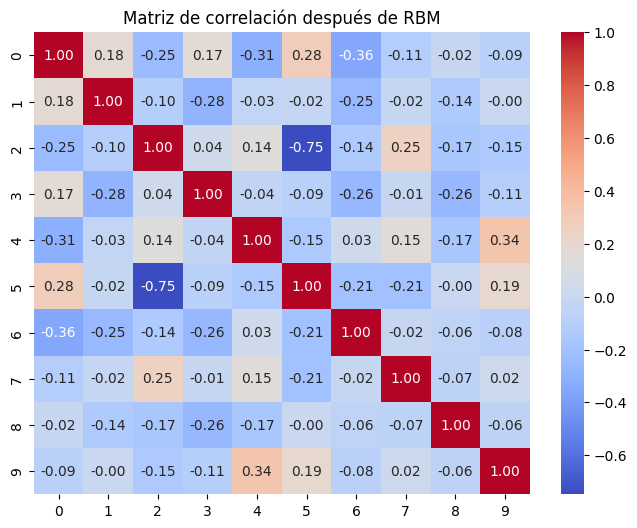

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculamos la matriz de correlación de las variables después de la RBM
correlation_matrix = pd.DataFrame(datos_rbm).corr()

# Graficamos la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación después de RBM")
plt.show()

In [21]:
# Normalizar los datos transformados por la RBM antes de PCA
scaler = StandardScaler()
datos_rbm_normalizados = scaler.fit_transform(datos_rbm)

In [22]:
# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2,whiten=True)  # Reducimos a 2 componentes principales para visualización
datos_pca = pca.fit_transform(datos_rbm_normalizados)


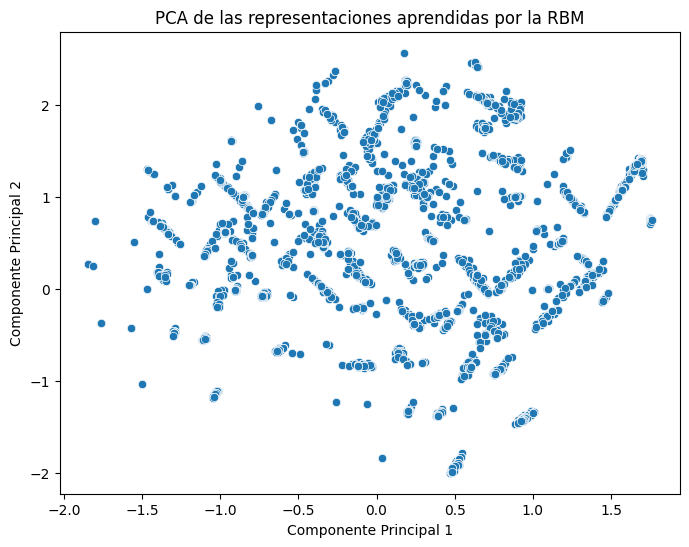

Varianza explicada por cada componente: [0.21995042 0.15947385]


In [23]:
# Convertir a DataFrame
datos_pca_df = pd.DataFrame(datos_pca, columns=['PC1', 'PC2'])

# Visualización de los datos en 2D
plt.figure(figsize=(8,6))
sns.scatterplot(x=datos_pca_df['PC1'], y=datos_pca_df['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de las representaciones aprendidas por la RBM')
plt.show()

# Mostrar la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)



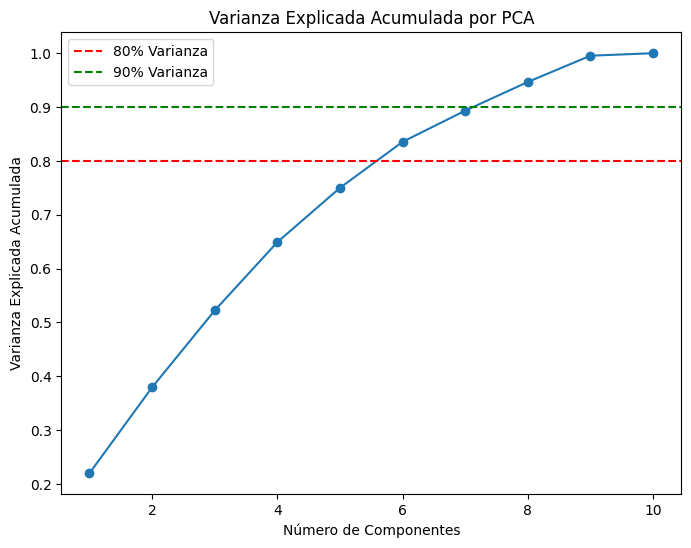

In [24]:
# Análisis de varianza explicada acumulada
pca_full = PCA()
pca_full.fit(datos_rbm_normalizados)
varianza_acumulada = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8,6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='-')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Varianza')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Varianza')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por PCA')
plt.legend()
plt.show()

PESOS DE PCA

In [25]:
datos_pca = datos_pca_df.values

# Calcular la entropía para cada componente principal
entropias = []
for i in range(datos_pca.shape[1]):
    # Crear un histograma para el componente principal
    hist, bin_edges = np.histogram(datos_pca[:, i], bins=20, density=True)
    # Normalizar el histograma para obtener probabilidades
    probs = hist / np.sum(hist)
    # Calcular la entropía
    H = entropy(probs, base=2)  # Base 2 para obtener bits
    entropias.append(H)

# Mostrar la entropía para cada componente principal
for i, H in enumerate(entropias, start=1):
    print(f"Entropía de la Componente Principal {i}: {H:.4f} bits")




Entropía de la Componente Principal 1: 4.2315 bits
Entropía de la Componente Principal 2: 3.9836 bits


# **K-medias**

In [26]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(datos_rbm)  # Usar la variable correcta que contiene las características transformadas por la RBM

# Asignar los clusters al DataFrame original
datos_importantes["Cluster"] = kmeans.labels_

# Ver las primeras filas con los clusters asignados
print(datos_importantes.head())

   cod_dpto  seg_social  niv_edum  edad_madre  Cluster
0        70           2         4         3.0        2
1        11           1         4         5.0        1
2        11           5         9         5.0        1
3        11           5         5         3.0        1
4        11           5         4         2.0        1


Estadísticas descriptivas por cluster:
          cod_dpto  seg_social  niv_edum  edad_madre
Cluster                                             
0        32.196009    1.000000  5.929461    4.535862
1        32.201874    3.296956  4.101483    3.463232
2        39.604131    2.000000  3.911161    4.086456
3        40.764450    2.332884  3.756514    3.749326


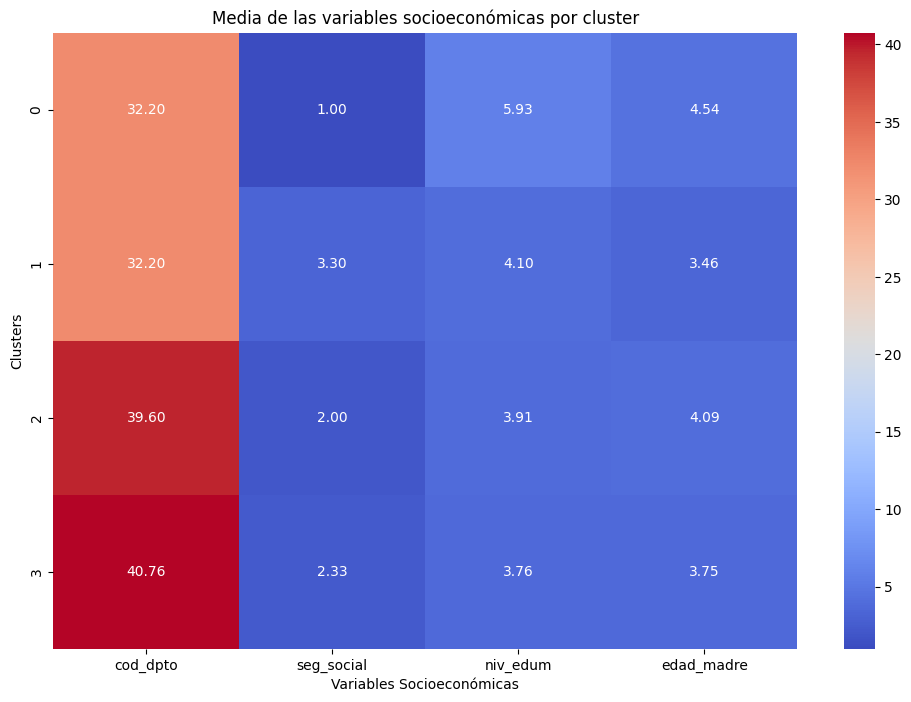

In [27]:
# Agrupar por cluster y calcular estadísticas
estadisticas_cluster = datos_importantes.groupby("Cluster").mean()

print("Estadísticas descriptivas por cluster:")
print(estadisticas_cluster)

# Visualizar las estadísticas con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(estadisticas_cluster, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Media de las variables socioeconómicas por cluster")
plt.xlabel("Variables Socioeconómicas")
plt.ylabel("Clusters")
plt.show()

In [28]:
# Agrupar por Cluster y cod_dpto, y contar las observaciones
conteo_dptos_por_cluster = datos_importantes.groupby(['Cluster', 'cod_dpto']).size().reset_index(name='Cantidad')

# Ordenar por cluster y cantidad (descendente)
conteo_dptos_por_cluster = conteo_dptos_por_cluster.sort_values(['Cluster', 'Cantidad'], ascending=[True, False])

# Mostrar resultados por clúster
for cluster in sorted(conteo_dptos_por_cluster['Cluster'].unique()):
    print(f"\n🔹 Departamentos más frecuentes en el Cluster {cluster}:\n")
    print(conteo_dptos_por_cluster[conteo_dptos_por_cluster['Cluster'] == cluster].head(10))



🔹 Departamentos más frecuentes en el Cluster 0:

    Cluster  cod_dpto  Cantidad
2         0        11      3405
0         0         5      1607
23        0        76      1411
20        0        68       589
10        0        25       411
17        0        54       349
12        0        41       314
16        0        52       240
9         0        23       230
15        0        50       222

🔹 Departamentos más frecuentes en el Cluster 1:

    Cluster  cod_dpto  Cantidad
34        1        11      2168
32        1         5       589
49        1        54       502
55        1        76       459
42        1        25       356
41        1        23       320
44        1        41       192
52        1        68       189
46        1        47       177
56        1        81       167

🔹 Departamentos más frecuentes en el Cluster 2:

    Cluster  cod_dpto  Cantidad
66        2        11       968
73        2        23       943
87        2        76       676
64        2       

In [29]:
from scipy.stats import entropy

def calcular_entropia_por_cluster(df, cluster_col, variable_col):
    entropias = {}

    for cluster_id in sorted(df[cluster_col].unique()):
        grupo = df[df[cluster_col] == cluster_id][variable_col]
        conteo = grupo.value_counts(normalize=True)
        ent = entropy(conteo, base=2)
        entropias[cluster_id] = ent

    return entropias

# Variables que quieres evaluar
variables = ['cod_dpto', 'edad_madre', 'niv_edum', 'seg_social']

# Calcular y mostrar entropías
for var in variables:
    entropias = calcular_entropia_por_cluster(datos_importantes, 'Cluster', var)
    print(f"\nEntropía por cluster respecto a '{var}':")
    for cluster, ent in entropias.items():
        print(f"  Cluster {cluster}: Entropía = {ent:.4f} bits")


Entropía por cluster respecto a 'cod_dpto':
  Cluster 0: Entropía = 3.3662 bits
  Cluster 1: Entropía = 3.6775 bits
  Cluster 2: Entropía = 4.2052 bits
  Cluster 3: Entropía = 4.4339 bits

Entropía por cluster respecto a 'edad_madre':
  Cluster 0: Entropía = 2.3616 bits
  Cluster 1: Entropía = 2.2077 bits
  Cluster 2: Entropía = 1.9911 bits
  Cluster 3: Entropía = 2.6111 bits

Entropía por cluster respecto a 'niv_edum':
  Cluster 0: Entropía = 2.5662 bits
  Cluster 1: Entropía = 1.2353 bits
  Cluster 2: Entropía = 1.1337 bits
  Cluster 3: Entropía = 2.1914 bits

Entropía por cluster respecto a 'seg_social':
  Cluster 0: Entropía = 0.0000 bits
  Cluster 1: Entropía = 1.6928 bits
  Cluster 2: Entropía = 0.0000 bits
  Cluster 3: Entropía = 0.6939 bits


**RANDOM FOREST**


🔹 Analizando seg_social como variable objetivo 🔹

Matriz de Confusión:
[[2400    0    0    0    0]
 [   0 2886    0    0    0]
 [   0    0   97    0    0]
 [   0    0    1    0    0]
 [   0    0    0    0  768]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2400
           2       1.00      1.00      1.00      2886
           3       0.99      1.00      0.99        97
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00       768

    accuracy                           1.00      6152
   macro avg       0.80      0.80      0.80      6152
weighted avg       1.00      1.00      1.00      6152


Precisión del Modelo:
0.9998374512353706

🔍 Importancia de las Variables:
   Variable  Importancia
2         2     0.402459
5         5     0.342168
6         6     0.069474
0         0     0.043202
1         1     0.042931
7         7     0.042703
3         3     0.019

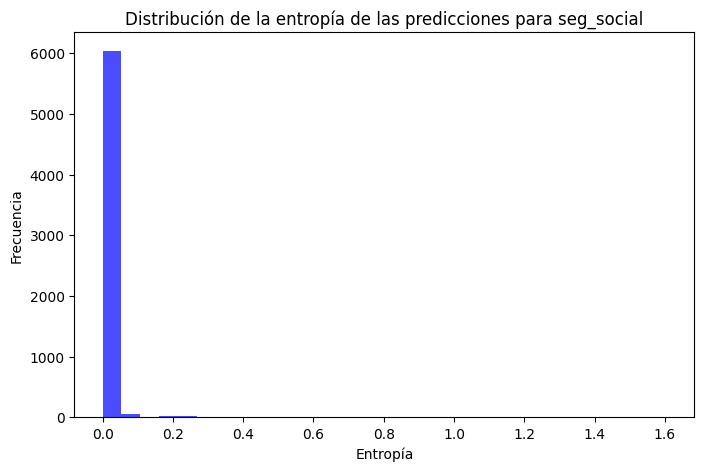


🔹 Analizando niv_edum como variable objetivo 🔹

Matriz de Confusión:
[[   8    0    0    0    0    0    0    0    0    0    1    0    4]
 [   0  636    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 1405    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 2555    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  162    0    0    8    0    0    0    0    0]
 [   6    0    0    0    1    1    0    0    0    0    2    0    0]
 [   0    1    0    0    0    0  428    0    0    0    0    0    0]
 [   0    0    0    0    6    0    4  225    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  599    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0   39    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0   10    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    1    0]
 [   0    0    0    0    4    0    2    0    0    2    0    0   42]]

Reporte de Clasificación:
              prec

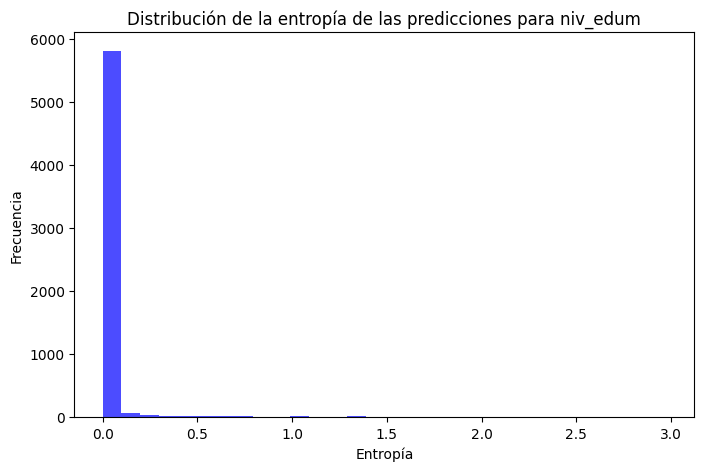


🔹 Analizando edad_madre como variable objetivo 🔹

Matriz de Confusión:
[[  57    0    0    0    0    0    0    2]
 [   0  908    0    0    0    0    0    0]
 [   0    0 1584    0    0    0    0    0]
 [   0    0    0 1383    0    0    0    0]
 [   0    0    0    0 1051    0    0    0]
 [   0    0    0    0    0  773    0    0]
 [   0    0    0    0    0    0  358    0]
 [   0    0    0    0    0    0    0   36]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98        59
         2.0       1.00      1.00      1.00       908
         3.0       1.00      1.00      1.00      1584
         4.0       1.00      1.00      1.00      1383
         5.0       1.00      1.00      1.00      1051
         6.0       1.00      1.00      1.00       773
         7.0       1.00      1.00      1.00       358
         8.0       0.95      1.00      0.97        36

    accuracy                           1.00      6152
   macro avg  

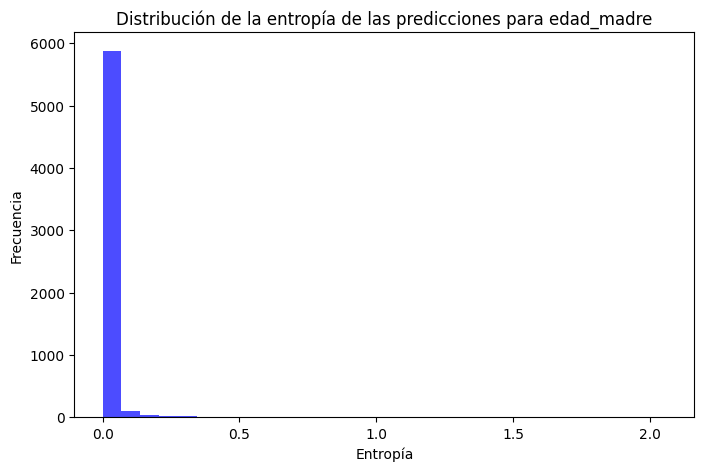


🔹 Analizando cod_dpto como variable objetivo 🔹

Matriz de Confusión:
[[ 656    0    0 ...    0    0    0]
 [   0  123    0 ...    0    0    0]
 [   0    0 1435 ...    0    0    0]
 ...
 [   0    0    0 ...   12    0    0]
 [   0    0    0 ...    0    2    0]
 [   0    1    0 ...    0    0    2]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           5       0.99      0.99      0.99       663
           8       0.95      0.98      0.96       126
          11       1.00      1.00      1.00      1435
          13       0.86      0.95      0.90       110
          15       0.89      0.88      0.88        81
          17       0.89      0.72      0.80        46
          18       0.85      0.89      0.87        53
          19       0.93      0.92      0.93        61
          20       0.75      0.84      0.79        49
          23       0.97      0.98      0.98       452
          25       0.96      0.99      0.97       266
          27       0.50   

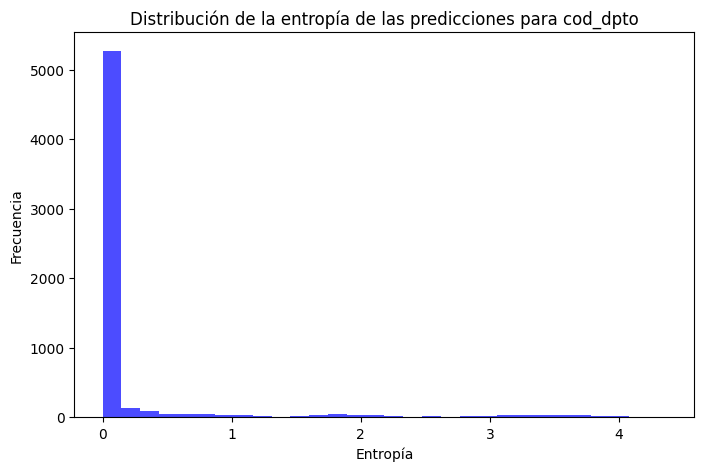

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir función para entrenar Random Forest y calcular entropía
def entrenar_random_forest(variable_objetivo):
    print(f"\n🔹 Analizando {variable_objetivo} como variable objetivo 🔹\n")

    # Definir variables de entrada (X) y variable de salida (y)
    X = datos_rbm_df  # Datos transformados por RBM
    y = datos_filtros[variable_objetivo]  # Ahora usamos datos_filtros en lugar de df_filtrado

    # Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Definir y entrenar el modelo Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = rf.predict(X_test)
    y_pred_proba = rf.predict_proba(X_test)  # Probabilidades de predicción

    # Evaluación del modelo
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred,zero_division=0))

    print("\nPrecisión del Modelo:")
    print(accuracy_score(y_test, y_pred))

    # Importancia de las variables
    importancia = pd.DataFrame({'Variable': X.columns, 'Importancia': rf.feature_importances_})
    importancia = importancia.sort_values(by='Importancia', ascending=False)

    print("\n🔍 Importancia de las Variables:")
    print(importancia)

    # Calcular entropía de las predicciones
    entropias = entropy(y_pred_proba.T, base=2)  # Transponer para que funcione con entropy
    entropia_promedio = np.mean(entropias)

    print(f"\n📊 Entropía promedio de las predicciones: {entropia_promedio}")

    # Graficar distribución de entropías
    plt.figure(figsize=(8, 5))
    plt.hist(entropias, bins=30, alpha=0.7, color='b')
    plt.xlabel('Entropía')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de la entropía de las predicciones para {variable_objetivo}')
    plt.show()

    return rf  # Retornar el modelo entrenado

# Variables a analizar como objetivo
variables_objetivo = ["seg_social", "niv_edum", "edad_madre", "cod_dpto"]

# Diccionario para almacenar modelos entrenados
trained_models = {}

# Ejecutar el análisis para cada variable objetivo
for var in variables_objetivo:
    trained_models[var] = entrenar_random_forest(var)


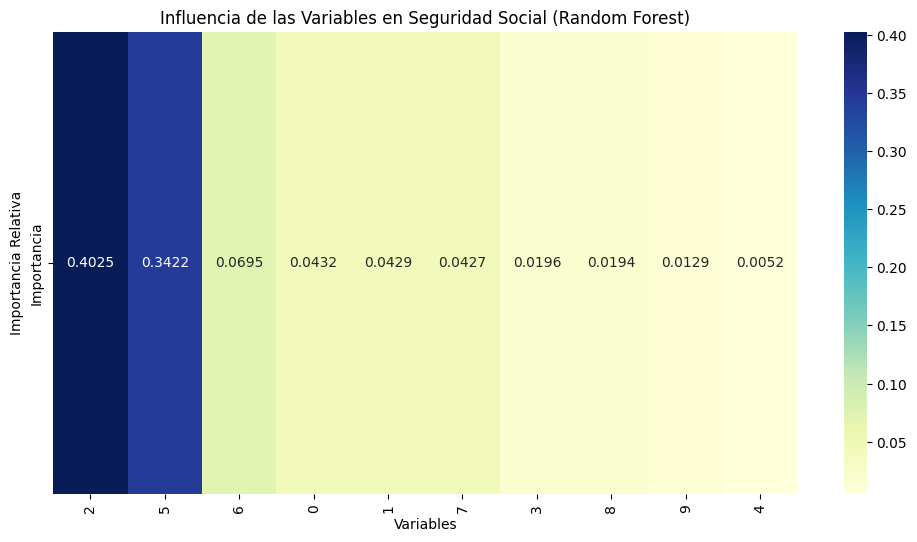

In [31]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Select the model for 'seg_social'
modelo_random_forest = trained_models['seg_social']

# Obtener la importancia de las características desde Random Forest
importances = modelo_random_forest.feature_importances_

# Crear un DataFrame con las importancias
df_importances = pd.DataFrame({
    'Variable': datos_rbm_df.columns,  # Nombres de las variables originales
    'Importancia': importances
})

# Ordenar por importancia
df_importances = df_importances.sort_values(by="Importancia", ascending=False)

# Crear un heatmap con la importancia de cada variable
plt.figure(figsize=(12, 6))
sns.heatmap(df_importances.set_index("Variable").T, cmap="YlGnBu", annot=True, fmt=".4f")

plt.title("Influencia de las Variables en Seguridad Social (Random Forest)")
plt.xlabel("Variables")
plt.ylabel("Importancia Relativa")
plt.xticks(rotation=90)
plt.show()


Gaussian Mixture Models (GMM)


In [43]:
# Paso 1: Obtener datos latentes desde la RBM
# Assuming 'datos_normalizados' from a previous cell contains the scaled data
X_latente = rbm.transform(datos_normalizados)


In [44]:
# Paso 2: Aplicar GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
labels = gmm.fit_predict(X_latente)
probs = gmm.predict_proba(X_latente)  # Matriz de probabilidades de pertenencia


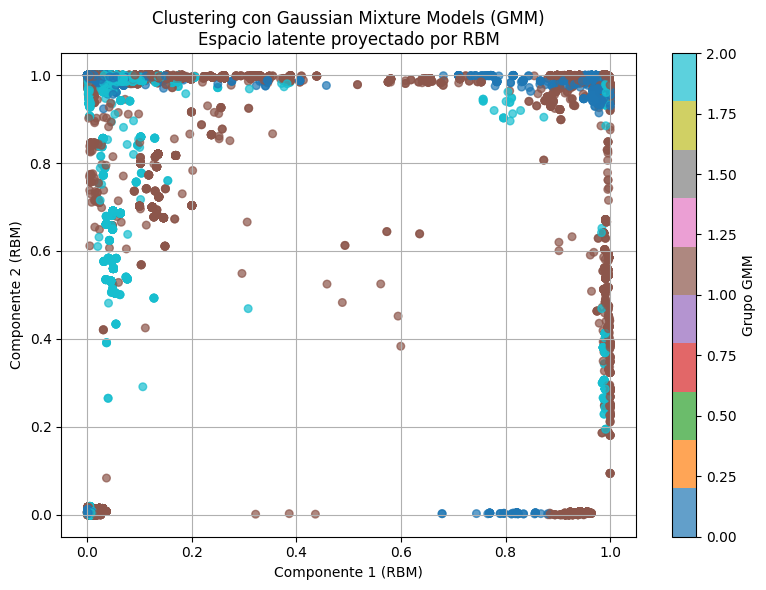

In [45]:
# Paso 3: Visualización de agrupaciones GMM
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_latente[:, 0], X_latente[:, 1], c=labels, cmap='tab10', s=30, alpha=0.7)
plt.colorbar(scatter, label='Grupo GMM')
plt.title("Clustering con Gaussian Mixture Models (GMM)\nEspacio latente proyectado por RBM")
plt.xlabel("Componente 1 (RBM)")
plt.ylabel("Componente 2 (RBM)")
plt.grid(True)
plt.tight_layout()
plt.show()

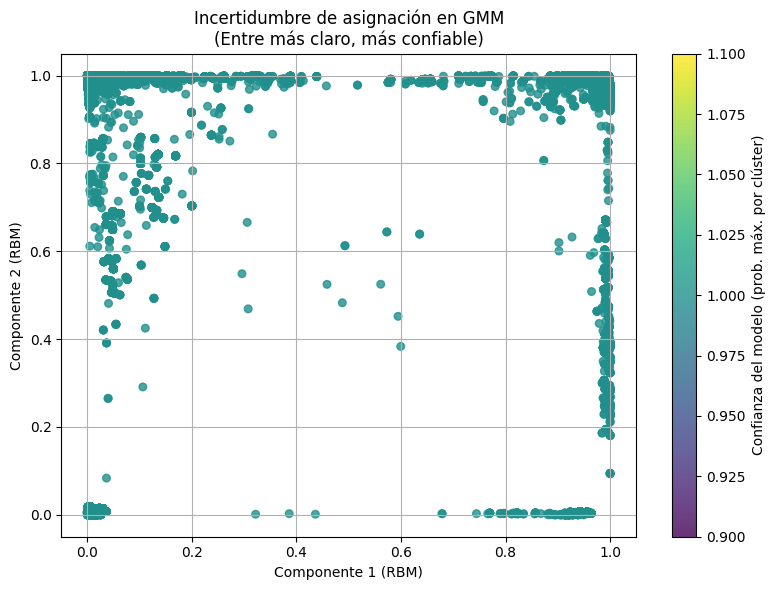

In [46]:
# Paso 4: Visualización de incertidumbre (máxima probabilidad por punto)
max_probs = probs.max(axis=1)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_latente[:, 0], X_latente[:, 1], c=max_probs, cmap='viridis', s=30, alpha=0.8)
cbar = plt.colorbar(scatter)
cbar.set_label("Confianza del modelo (prob. máx. por clúster)")
plt.title("Incertidumbre de asignación en GMM\n(Entre más claro, más confiable)")
plt.xlabel("Componente 1 (RBM)")
plt.ylabel("Componente 2 (RBM)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
# Paso 5 (opcional): Evaluación de cohesión de los clústeres
score = silhouette_score(X_latente, labels)
print(f"Silhouette Score del modelo GMM: {score:.4f}")

Silhouette Score del modelo GMM: 0.2043


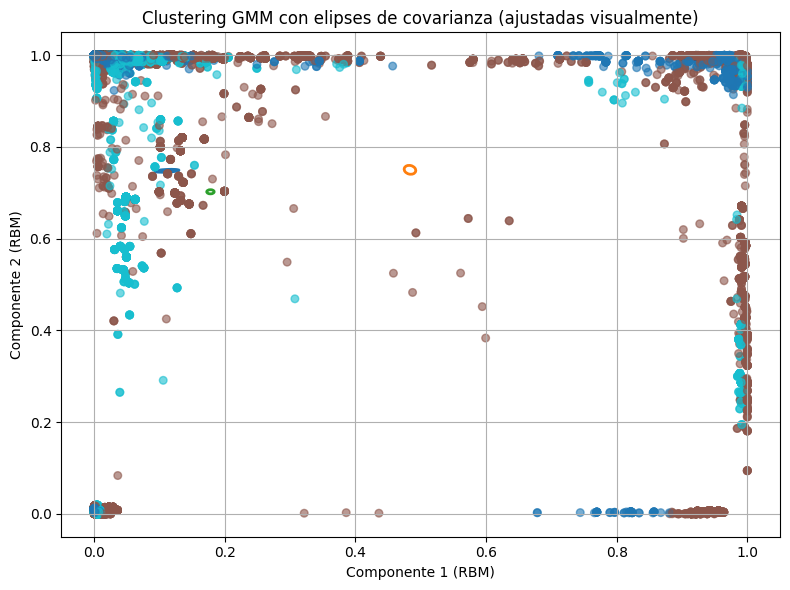

In [57]:
plt.figure(figsize=(8, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green']

for i in range(gmm.n_components):
    mean = gmm.means_[i]
    cov = gmm.covariances_[i]

    # Calcular elipses y escalar manualmente para visualización
    v, w = np.linalg.eigh(cov)
    v = 4.0 * np.sqrt(2.0) * np.sqrt(v)  # Escalado visual aumentado
    u = w[0] / np.linalg.norm(w[0])
    angle = np.degrees(np.arctan2(u[1], u[0]))

    ell = Ellipse(mean, v[0], v[1], angle=angle, edgecolor=colors[i], lw=2, facecolor='none')
    plt.gca().add_patch(ell)

# Puntos
plt.scatter(X_latente[:, 0], X_latente[:, 1], c=labels, cmap='tab10', s=30, alpha=0.6)

# Formato
plt.title("Clustering GMM con elipses de covarianza (ajustadas visualmente)")
plt.xlabel("Componente 1 (RBM)")
plt.ylabel("Componente 2 (RBM)")
plt.grid(True)
plt.tight_layout()
plt.show()


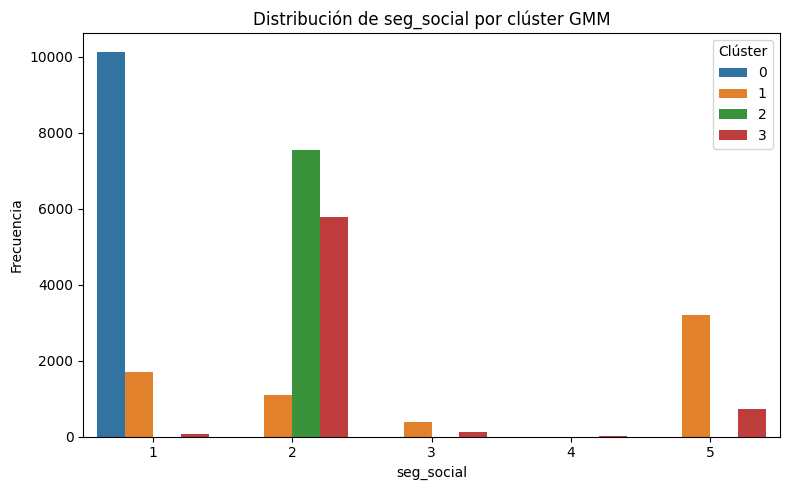

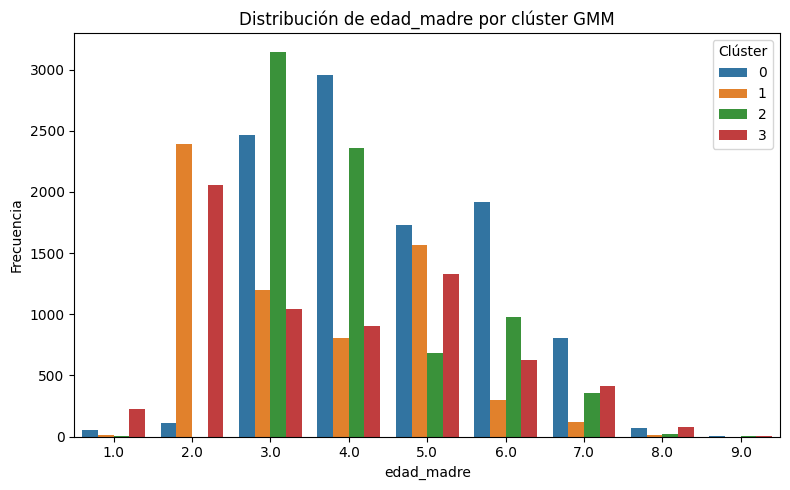

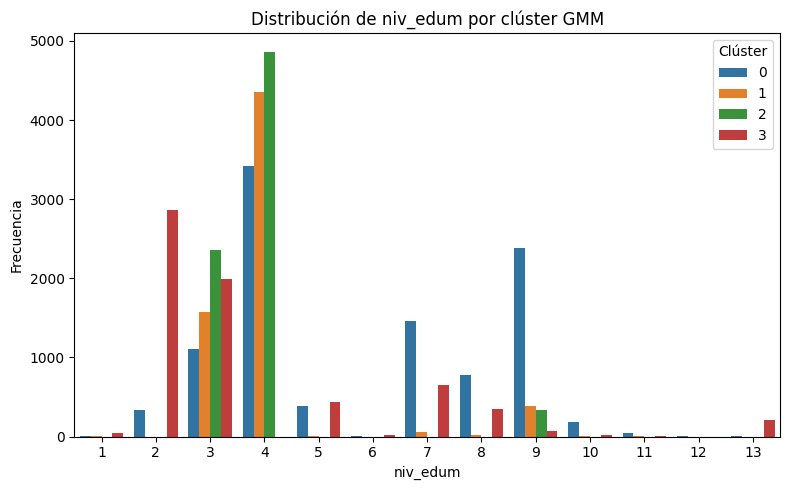

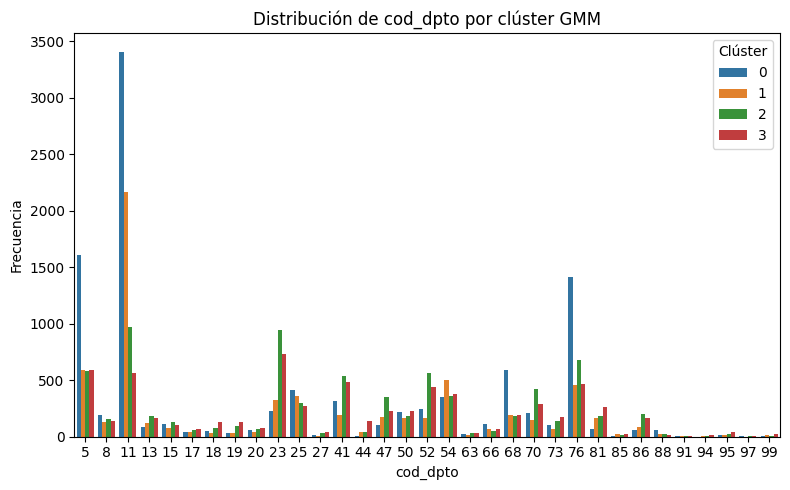

In [60]:
# Lista de variables a graficar
variables = ['seg_social', 'edad_madre', 'niv_edum', 'cod_dpto']  # Changed to lowercase

# Crear y guardar los gráficos
for var in variables:
    plt.figure(figsize=(8, 5))
    # Use datos_importantes instead of data, as it contains the 'Cluster' column
    sns.countplot(data=datos_importantes, x=var, hue='Cluster', palette='tab10')
    plt.title(f'Distribución de {var} por clúster GMM')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.legend(title='Clúster')
    plt.tight_layout()

    # Guardar como imágenes (alta resolución)
    plt.savefig(f'{var}_por_cluster_GMM.png', dpi=300)
    plt.savefig(f'{var}_por_cluster_GMM.pdf')

    # Mostrar en pantalla (opcional)
    plt.show()